# Coefficients of the profle caused by Size effects

Following Gubicza ... we first define the variable 
$$
\kappa = \frac{2\sin \theta}{\lambda},
$$

where $\theta$ is the scattering angle, $\lambda$ is the X-ray wavelength. For a face centered cubic (FCC) lattice, the intensity profile, in Fourier space, associated to size effects is given as

$$
A_S(L) =  e^{2\pi\left(F_{hkl} \frac{|L|}{2} + L \Delta_{hkl}\right)},
$$

where $F_{hkl}$ is the full-width at half maximum associated to the peak with Miller-indices $h,k,l$ and $\Delta $ is the shift relative to the Bragg position. The variable $L$ is related to $\kappa$ through the Fourier-transform

$$
I(\kappa) = \int_{-\infty}^\infty I(L)e^{2\pi i\kappa L }dL.
$$

The full width at half maximum depends on whether (either intrinsic or extrinsic) _stacking faults_ or _twin boundaries_ are present in the material. For stacking faults, we have

$$
F_{hkl} = \frac{1}{3a}\frac{|h+k+l|}{\sqrt{h^2 + k^2 + l^2}}\log \frac{1}{1-3\alpha + 3\alpha^2},
$$
where $\alpha\in[0,1)$ is the probability of stacking faults and $a$ is the lattice constant. For twin boundaries, we have

$$
F_{hkl} = \frac{1}{3a}\frac{|h+k+l|}{\sqrt{h^2 + k^2 + l^2}}\frac{2\beta}{\sqrt{1-\beta}},
$$
where $\beta\in [0,1)$ is the probability of twin boundaries.


The deviation from the Bragg position can be expressed as

$$
\Delta_{hkl} = \pm \frac{1}{3a}\frac{|h+k+l|}{\sqrt{h^2 + k^2 + l^2}}\left[\arctan \left(\sqrt{3}(1-2\alpha) \right) -\frac{\pi}{3} \right],
$$

where the positive sign corresponds to intrinsic faults and the negative corresponds to extrinsic faults. Note that $\Delta \neq 0$ only for stacking faults. Moreover, $I(\kappa) = \text{const.}$ for BCC and SC lattices.


In [226]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fftfreq, fft, ifft, ifftshift, fftshift
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [227]:
import matplotlib

In [228]:
%load_ext autoreload
%autoreload 2
%aimport  cmwp_profiles

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [229]:
from cmwp_profiles.peak_shapes import Peak, generate_multiple_peaks


In [230]:
N = 1024 * 8 


Here we initialize a Peak object

with the following properties:

$$a =0.36, b =0.255, C_{h00}=0.1. $$


The computational domain will correspond to $\kappa \in [0, \kappa_{max}]$ with $\kappa_{max}=14$. 

In [231]:
lattice_constant = 0.36



## Full width at half maximum



The width of a peak with given indices $h=2$, $k=l=0$ is determined by the planar fault probability. Let us compare stacking faults and twin faults with increasing fault probability.



In [264]:
h, k, l = 3, -1, -1
single_peak_stacking_fault = Peak(14, N, 0.1, 0.255, lattice_constant, stacking_or_twin_fault='stacking')
single_peak_twin = Peak(14, N, 0.1, 0.255, lattice_constant, stacking_or_twin_fault='twin')

planar_fault_probabilities = np.linspace(0,0.99, 200)
fwhm_stacking = single_peak_stacking_fault._full_width_half_max(lattice_constant, h, k, l, planar_fault_probabilities)
fwhm_twin = single_peak_twin._full_width_half_max(lattice_constant, h, k, l, planar_fault_probabilities)


(0.0, 6.5)

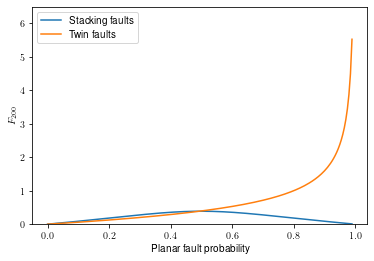

In [265]:
plt.figure(figsize = (6,4))
plt.plot(planar_fault_probabilities, fwhm_stacking, label = 'Stacking faults')
plt.plot(planar_fault_probabilities, fwhm_twin, label = 'Twin faults')
plt.xlabel('Planar fault probability')
plt.ylabel('$F_{200}$')
plt.legend()
plt.ylim(0,6.5)

## Shift from the Bragg-position

For stacking faults, we can also evaluate the shift for the same peak.


In [266]:
delta_stacking_intrinsic = single_peak_stacking_fault._delta_hkl(lattice_constant, h, k, l,
                                                       planar_fault_probabilities,
                                                  intrinsic_or_extrinsic = 'intrinsic')
delta_stacking_extrinsic = single_peak_stacking_fault._delta_hkl(lattice_constant, h, k, l,
                                                       planar_fault_probabilities,
                                                  intrinsic_or_extrinsic = 'extrinsic')


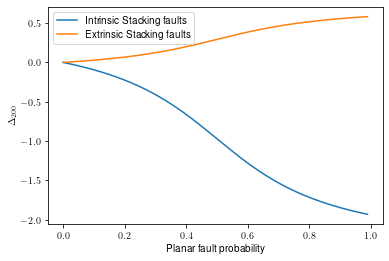

In [267]:
plt.figure(figsize = (6,4))
plt.plot(planar_fault_probabilities, delta_stacking, label = 'Intrinsic Stacking faults')
plt.plot(planar_fault_probabilities, delta_stacking_extrinsic, label = 'Extrinsic Stacking faults')

plt.xlabel('Planar fault probability')
plt.ylabel('$\Delta_{200}$')
plt.legend()

## Evaluating the planar fault profiles 

Now we compute the profile with varying fault probabilities

Text(0.5, 1.0, 'Intrinsic faults')

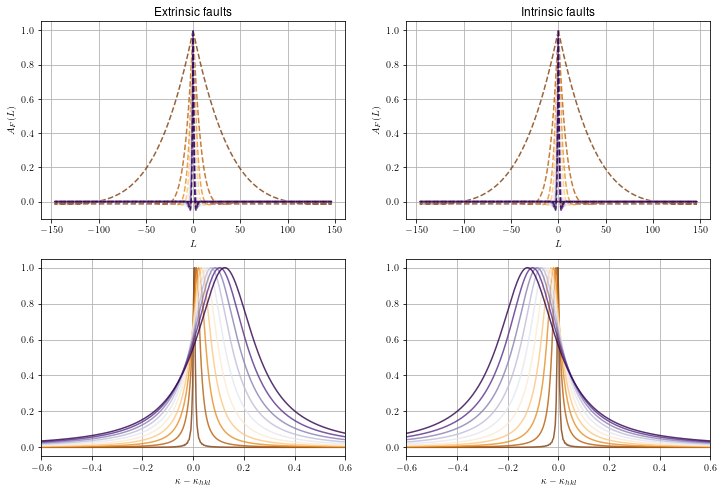

In [358]:
b_s = np.linspace(0.01, 0.3, 10)

norm = matplotlib.colors.Normalize(
    vmin=0.01,
    vmax=0.3)

colormap = matplotlib.cm.PuOr
scalar_mappable_colormap = matplotlib.cm.ScalarMappable(cmap=colormap, norm=norm)
scalar_mappable_colormap.set_array([])

single_peak_stacking_fault = Peak(14, N, 1, 0.255, lattice_constant, stacking_or_twin_fault='stacking')
lengthOfFrame = 2 * single_peak_stacking_fault.max_range_diffraction_vector
L = single_peak_stacking_fault.math.fftfreq(single_peak_stacking_fault.Nfourier, 
                                            lengthOfFrame / single_peak_stacking_fault.Nfourier).reshape(-1, 1) + 1e-16
N = len(L)
dell = L[1,:] - L[0,:]
factor = dell * N # normalization factor for the Fourier transform


fig = plt.figure(figsize = (12, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


for b in b_s:
    ft_stackfault_ex = single_peak_stacking_fault.fourier_coefficients_planar_fault(L, b, h, k, l, intrinsic_or_extrinsic = 'extrinsic')
    profile = np.abs(single_peak_stacking_fault.math.ifftshift(single_peak_stacking_fault.math.ifft ( ft_stackfault_ex, axis = 0), axes =0)) * factor
    max_value =  np.max(profile)
    ax1.plot(L, np.real(ft_stackfault_ex), '--', c=scalar_mappable_colormap.to_rgba(b), alpha =0.8)#
    ax3.plot(single_peak_stacking_fault.diffraction_vectors, profile / max_value, '-', c=scalar_mappable_colormap.to_rgba(b), alpha =0.8)#
    ft_stackfault_in = single_peak_stacking_fault.fourier_coefficients_planar_fault(L, b, h, k, l, intrinsic_or_extrinsic = 'instrinsic')
    profile = np.abs(single_peak_stacking_fault.math.ifftshift(single_peak_stacking_fault.math.ifft ( ft_stackfault_in, axis = 0 ), axes =0)) * factor
    max_value = np.max(profile)
    ax2.plot(L, np.real(ft_stackfault_in), '--', c=scalar_mappable_colormap.to_rgba(b), alpha =0.8)#

    ax4.plot(single_peak_stacking_fault.diffraction_vectors, profile / max_value, '-',c=scalar_mappable_colormap.to_rgba(b), alpha =0.8)#

ax3.set_xlim(-.6,.6 )
ax4.set_xlim(-.6,.6 )
for a in [ax1, ax2, ax3, ax4]:
    a.grid()
#plt.colorbar(scalar_mappable_colormap,label = 'Fault probability')
ax1.set_ylabel('$A_F(L)$')
ax2.set_ylabel('$A_F(L)$')
ax1.set_xlabel('$L$')
ax2.set_xlabel('$L$')


ax3.set_xlabel('$\kappa - \kappa_{hkl}$')
ax4.set_xlabel('$\kappa - \kappa_{hkl}$')
ax1.set_title('Extrinsic faults')
ax2.set_title('Intrinsic faults')


In [298]:
L = np.fft.fftfreq(1024, d = 2 / 1024)

In [341]:
F_comp = np.exp(-2*np.pi*0.1*np.abs(L) -  .15 * 1j*L)
F_comp_2 = np.exp(-2*np.pi*0.1*np.abs(L) +  .15 * 1j*L)

/Users/balintkaszas/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/balintkaszas/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


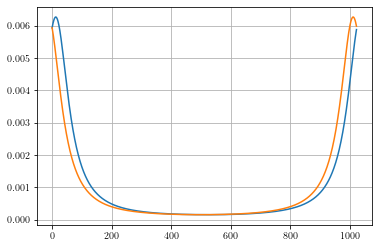

In [342]:
plt.plot(np.fft.ifft(F_comp))
plt.plot(np.fft.ifft(F_comp_2))
plt.grid()

/Users/balintkaszas/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/balintkaszas/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


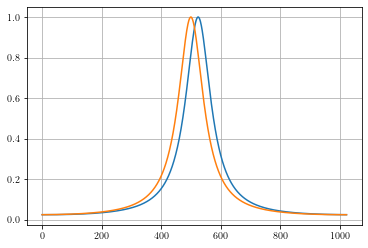

In [343]:
plt.plot(np.fft.fftshift((np.fft.ifft(F_comp))/ (np.fft.ifft(F_comp)).max()))
plt.plot((np.fft.fftshift(np.fft.ifft(F_comp_2)) / (np.fft.ifft(F_comp_2)).max()))
plt.grid()

### Testing the dislocation coefficients

Now $\rho^*$, $R^*$, h, k, land $q$ can change. 

$g = h^2 + k^2 + l^2$


Text(0.5, 1.0, 'Varying $\\rho^*$')

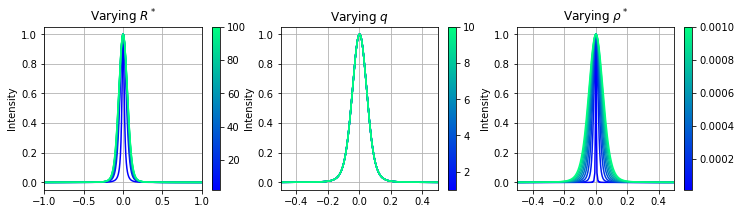

In [42]:
b_s = np.linspace(0.01, 0.05, 10)
norm = matplotlib.colors.Normalize(
    vmin=2,
    vmax=100)

colormap = matplotlib.cm.winter

rstars = np.linspace(2, 100, 10)
g = h**2 + k**2 + l**2
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 3))
norm = matplotlib.colors.Normalize(
    vmin=rstars.min(),
    vmax=rstars.max())
scalar_mappable_colormap = matplotlib.cm.ScalarMappable(cmap=colormap, norm=norm)
scalar_mappable_colormap.set_array([])
for r in rstars:
    
    ft_dislocation = singlePeak.fourier_coefficients_dislocation(np.abs(L),
                                                      0.0010078875, 
                                                          r, 
                                                          h, k, l, g, 
                                                         1.4, 0.5)
    profile = np.abs(ifftshift( ifft ( ft_dislocation ))) * factor
    max_value = np.max(profile)
    axes[0].plot(S, profile / max_value, '-', c=scalar_mappable_colormap.to_rgba(r))#
plt.colorbar(scalar_mappable_colormap, ax = axes[0])

    
##
qs = np.linspace(1., 10, 10)

norm = matplotlib.colors.Normalize(
    vmin = qs.min(),
    vmax = qs.max())
scalar_mappable_colormap = matplotlib.cm.ScalarMappable(cmap=colormap, norm=norm)
scalar_mappable_colormap.set_array([])
for q in qs:
    
    ft_dislocation = singlePeak.fourier_coefficients_dislocation(np.abs(L),
                                                      0.0010078875, 
                                                          30, 
                                                          h, k, l, g, 
                                                         q, 0.5)
    profile = np.abs(ifftshift( ifft ( ft_dislocation ))) * factor
    max_value = np.max(profile)
    axes[1].plot(S, profile / max_value, '-', c=scalar_mappable_colormap.to_rgba(q))#
axes[0].set_xlim(-1, 1)
axes[1].set_xlim(-0.5, 0.5)
plt.colorbar(scalar_mappable_colormap, ax = axes[1])




rhostars = np.linspace(1e-5, 0.001, 10)

norm = matplotlib.colors.Normalize(
    vmin = rhostars.min(),
    vmax = rhostars.max())
scalar_mappable_colormap = matplotlib.cm.ScalarMappable(cmap=colormap, norm=norm)
scalar_mappable_colormap.set_array([])
for r in rhostars:
    
    ft_dislocation = singlePeak.fourier_coefficients_dislocation(np.abs(L),
                                                      r, 
                                                          30, 
                                                          h, k, l, g, 
                                                         2, 0.5)
    profile = np.abs(ifftshift( ifft ( ft_dislocation ))) * factor
    max_value = np.max(profile)
    axes[2].plot(S, profile / max_value, '-', c=scalar_mappable_colormap.to_rgba(r))#
axes[0].set_xlim(-1, 1)
axes[1].set_xlim(-0.5, 0.5)
axes[2].set_xlim(-0.5, 0.5)

plt.colorbar(scalar_mappable_colormap, ax = axes[2])
for a in axes:
    a.grid()
    a.set_ylabel('Intensity')
    
axes[0].set_title('Varying $R^*$')
axes[1].set_title('Varying $q$')
axes[2].set_title('Varying $\\rho^*$')

### Testing the size coefficients


Text(0.5, 1.0, 'Varying $\\sigma$')

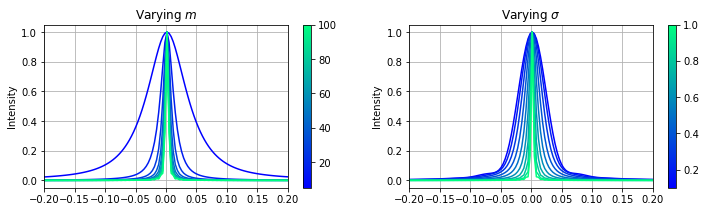

In [43]:
m_s = np.linspace(5, 100, 10)
sigmas = np.linspace(0.1, 1, 10)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 3))
norm = matplotlib.colors.Normalize(
    vmin=m_s.min(),
    vmax=m_s.max())
scalar_mappable_colormap = matplotlib.cm.ScalarMappable(cmap=colormap, norm=norm)
scalar_mappable_colormap.set_array([])
for m in m_s:
    
    ft_size = singlePeak.fourier_coefficients_size(np.abs(L),
                                                      m, 0.5) 
    profile = np.abs(ifftshift( ifft ( ft_size ))) * factor
    max_value = np.max(profile)
    axes[0].plot(S, profile / max_value, '-', c=scalar_mappable_colormap.to_rgba(m))#
plt.colorbar(scalar_mappable_colormap, ax = axes[0])
axes[0].set_xlim(-0.5, 0.5)

##

norm = matplotlib.colors.Normalize(
    vmin=sigmas.min(),
    vmax=sigmas.max())
scalar_mappable_colormap = matplotlib.cm.ScalarMappable(cmap=colormap, norm=norm)
scalar_mappable_colormap.set_array([])
for s in sigmas:
    ft_size = singlePeak.fourier_coefficients_size(np.abs(L),
                                                      20, s) 
    profile = np.abs(ifftshift( ifft ( ft_size ))) * factor
    max_value = np.max(profile)
    axes[1].plot(S, profile / max_value, '-', c=scalar_mappable_colormap.to_rgba(s))#
plt.colorbar(scalar_mappable_colormap, ax = axes[1])
for a in axes:
    a.set_xlim(-0.2, 0.2)
    a.grid()
    a.set_ylabel('Intensity')
axes[0].set_title('Varying $m$')
axes[1].set_title('Varying $\\sigma$')

### Testing the convolution 

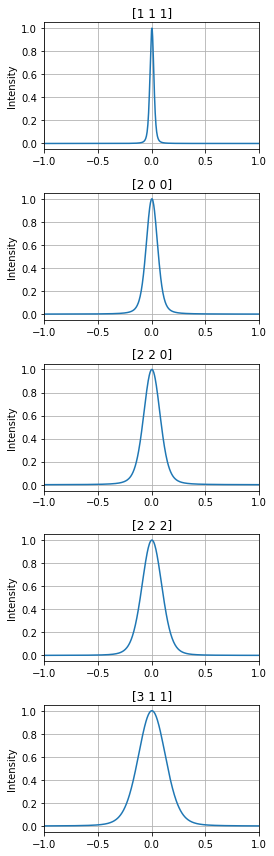

In [45]:
m = 20
q = 2
rhostar = 0.001
B = 0.01
Rstar = 40
sigma = 0.9

fig, axes = plt.subplots(nrows = 5, ncols = 1, figsize = (4, 12))
for a, miller_idx in zip(axes, structure.miller_indices):
    h, k, l = miller_idx
    g = h**2 + k**2 + l**2
    profile = singlePeak.generate_convolutional_profile(L, m, sigma, B, rhostar, Rstar, q, g, h, k, l, 0.5)
    a.plot(S, profile)
    a.set_xlim(-1, 1)
    a.set_ylabel('Intensity')
    a.grid()
    a.set_title('[%s %s %s]' %(h,k,l))
fig.tight_layout()

### Check the complete spectrum

In [47]:
variables = {}
variables['B'] = B
variables['m'] = m
variables['sigma'] = sigma
variables['rho'] = rhostar
variables['Rstar'] = Rstar
variables['q'] = q


#### Compare the polynomial vs interpolated approximations for the integral

In [65]:
singlePeak = peak_shapes.Peak(max_range_diffraction_vector = 14,
                              max_fourier_components = N,
                              Ch00 = 0.2,
                              lattice_constant = 0.36,
                              burgers_vector = 0.255,
                         phase = 'fcc', approximation_wilkens='polynomial')

In [72]:
%%time
intensity_poly = peak_shapes.generate_multiple_peaks(singlePeak, 
                                                variables,
                                                [1, 0.5, 0.3, 0.8, 0.23])

CPU times: user 13.9 ms, sys: 617 µs, total: 14.6 ms
Wall time: 13.9 ms


In [73]:
intensity_poly

array([1.23257247e-05, 1.23522615e-05, 1.23598700e-05, ...,
       2.92394920e-05, 2.91514821e-05, 2.90658315e-05])

In [74]:
singlePeak = peak_shapes.Peak(max_range_diffraction_vector = 14,
                              max_fourier_components = N,
                              Ch00 = 0.2,
                              lattice_constant = 0.36,
                              burgers_vector = 0.255,
                         phase = 'fcc', approximation_wilkens='exact')

In [75]:
%%time 
intensity_exact = peak_shapes.generate_multiple_peaks(singlePeak, 
                                                variables,
                                                [1, 0.5, 0.3, 0.8, 0.23])

CPU times: user 1.15 s, sys: 5.66 ms, total: 1.16 s
Wall time: 1.16 s


In [76]:
singlePeak = peak_shapes.Peak(max_range_diffraction_vector = 14,
                              max_fourier_components = N,
                              Ch00 = 0.2,
                              lattice_constant = 0.36,
                              burgers_vector = 0.255,
                         phase = 'fcc', approximation_wilkens='interpolation')

In [77]:
%%time
intensity_interp = peak_shapes.generate_multiple_peaks(singlePeak, 
                                                variables,
                                                [1, 0.5, 0.3, 0.8, 0.23])

CPU times: user 11.5 ms, sys: 815 µs, total: 12.3 ms
Wall time: 11.5 ms


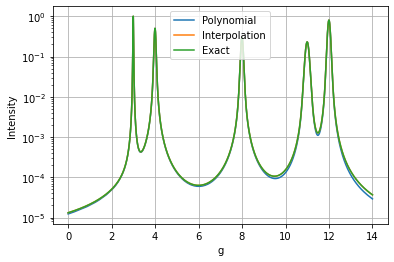

In [78]:
plt.semilogy(singlePeak.positive_diffraction_vectors, np.real(intensity_poly), '-', label='Polynomial')
plt.semilogy(singlePeak.positive_diffraction_vectors, np.real(intensity_interp), '-', label='Interpolation')
plt.semilogy(singlePeak.positive_diffraction_vectors, np.real(intensity_exact), '-', label='Exact')

plt.xlabel('g')
plt.ylabel('Intensity')
plt.grid()
plt.legend()

## BCC

In [79]:
singlePeak = peak_shapes.Peak(max_range_diffraction_vector = 14,
                              max_fourier_components = N,
                              Ch00 = 0.2,
                              lattice_constant = 0.36,
                              burgers_vector = 0.255,
                         phase = 'bcc', approximation_wilkens='interpolation')

In [80]:
intensity_poly = peak_shapes.generate_multiple_peaks(singlePeak,
                                                variables,
                                                [1, 0.5, 0.3, 0.8, 0.23])

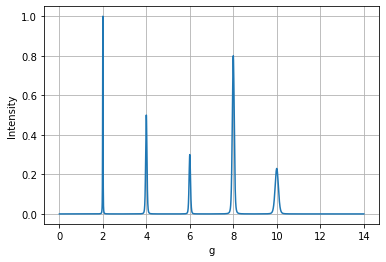

In [81]:
plt.plot(singlePeak.positive_diffraction_vectors, np.real(intensity_poly), '-')

plt.xlabel('g')
plt.ylabel('Intensity')
plt.grid()


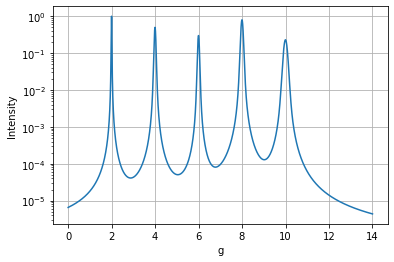

In [82]:
plt.semilogy(singlePeak.positive_diffraction_vectors, np.real(intensity_poly), '-')

plt.xlabel('g')
plt.ylabel('Intensity')
plt.grid()
